Handling Missing values

In [269]:
import numpy as np 
import pandas as pd
from sklearn.impute import SimpleImputer 
#Load Data
        
datasets = pd.read_csv('/content/Exercise-CarData.csv') 
print("\nData :\n",datasets)

X = datasets.iloc[:, 1:].values # all column except untitled i.e record number column
Y=  datasets.iloc[:, 0].values  # record number column
print(X)
print(Y)


Data :
       Unnamed: 0  Price   Age     KM  ... Automatic    CC  Doors  Weight
0              0  13500  23.0  46986  ...         0  2000  three    1165
1              1  13750  23.0  72937  ...         0  2000      3    1165
2              2  13950  24.0  41711  ...         0  2000      3    1165
3              3  14950  26.0  48000  ...         0  2000      3    1165
4              4  13750  30.0  38500  ...         0  2000      3    1170
...          ...    ...   ...    ...  ...       ...   ...    ...     ...
1431        1431   7500   NaN  20544  ...         0  1300      3    1025
1432        1432  10845  72.0     ??  ...         0  1300      3    1015
1433        1433   8500   NaN  17016  ...         0  1300      3    1015
1434        1434   7250  70.0     ??  ...         0  1300      3    1015
1435        1435   6950  76.0      1  ...         0  1600      5    1114

[1436 rows x 11 columns]
[[13500 23.0 '46986' ... 2000 'three' 1165]
 [13750 23.0 '72937' ... 2000 '3' 1165]
 [139

In [270]:
# Removing the row with all null values

datasets.dropna(how='all',inplace=True)
print("\nNew Data :",datasets)


New Data :       Unnamed: 0  Price   Age     KM  ... Automatic    CC  Doors  Weight
0              0  13500  23.0  46986  ...         0  2000  three    1165
1              1  13750  23.0  72937  ...         0  2000      3    1165
2              2  13950  24.0  41711  ...         0  2000      3    1165
3              3  14950  26.0  48000  ...         0  2000      3    1165
4              4  13750  30.0  38500  ...         0  2000      3    1170
...          ...    ...   ...    ...  ...       ...   ...    ...     ...
1431        1431   7500   NaN  20544  ...         0  1300      3    1025
1432        1432  10845  72.0     ??  ...         0  1300      3    1015
1433        1433   8500   NaN  17016  ...         0  1300      3    1015
1434        1434   7250  70.0     ??  ...         0  1300      3    1015
1435        1435   6950  76.0      1  ...         0  1600      5    1114

[1436 rows x 11 columns]


In [ ]:
#replacing ?? and ???? with null
x=datasets["KM"][1434]
for i in range(1436):
  if(datasets["KM"][i] ==x):
    datasets["KM"][i]=np.nan
#print(datasets["KM"])
x=datasets["HP"][6]
for i in range(1436):
  if(datasets["HP"][i] ==x):
    datasets["HP"][i]=np.nan
#print(datasets["HP"])

In [272]:
#Imputation (Replacing null values with mean value of that attribute)

# All rows, all columns except first 
new_X = datasets.iloc[:, 1:].values 
  
# Only first column  
new_Y = datasets.iloc[:, 0].values 


# Using Imputer function to replace NaN values with mean of that parameter value 
imputer = SimpleImputer(missing_values = np.nan,strategy = "mean")
imputer2 = SimpleImputer(missing_values = np.nan,strategy = "mean")

# Fitting the data, function learns the stats 
imputer = imputer.fit(new_X[:, 1:3]) 
imputer2 = imputer2.fit(new_X[:, 4:6]) 
# fit_transform() will execute those stats on the input ie. X[:, 1:3] 
datasets.iloc[:, 2:4] = imputer.transform(new_X[:, 1:3]) 
datasets.iloc[:, 5:7] = imputer.transform(new_X[:, 4:6]) 
# filling the missing value with mean 
print("\n\nNew Input with Mean Value for NaN : \n\n", datasets) 



New Input with Mean Value for NaN : 

       Unnamed: 0  Price        Age  ...    CC  Doors  Weight
0              0  13500  23.000000  ...  2000  three    1165
1              1  13750  23.000000  ...  2000      3    1165
2              2  13950  24.000000  ...  2000      3    1165
3              3  14950  26.000000  ...  2000      3    1165
4              4  13750  30.000000  ...  2000      3    1170
...          ...    ...        ...  ...   ...    ...     ...
1431        1431   7500  55.672156  ...  1300      3    1025
1432        1432  10845  72.000000  ...  1300      3    1015
1433        1433   8500  55.672156  ...  1300      3    1015
1434        1434   7250  70.000000  ...  1300      3    1015
1435        1435   6950  76.000000  ...  1600      5    1114

[1436 rows x 11 columns]


In [273]:
for i in range(1436):
  if(datasets['Doors'][i]=='three'):
    datasets['Doors'][i]='3'
  if(datasets['Doors'][i]=='four'):
    datasets['Doors'][i]='4'
  if(datasets['Doors'][i]=='five'):
    datasets['Doors'][i]='5'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [274]:
print(datasets[datasets.FuelType == 'Petrol'].shape[0])
print(datasets[datasets.FuelType == 'Diesel'].shape[0])
print(datasets[datasets.FuelType == 'CNG'].shape[0])
x=['Petrol','Diesel','CNG']
m=datasets['FuelType'][7]
#print(m,type(m))
for i in range(1436):
  if(datasets['FuelType'][i]is m):
    datasets['FuelType'][i]=x[i%3]    #running as per index of missing value foe equal distribution
    #print(i%3,x[i%3])
#datasets['FuelType'][7]

1177
144
15


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Data Transformation

In [275]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# All rows, all columns except first 
X = datasets.iloc[:, 1:].values 
  
# Only first column  
Y = datasets.iloc[:, 0].values 
#print(X)
#print(Y)
X_new = datasets.iloc[:,1:4].values
print("\n\nX for transformation : \n", X_new)



X for transformation : 
 [[1.35000000e+04 2.30000000e+01 4.69860000e+04]
 [1.37500000e+04 2.30000000e+01 7.29370000e+04]
 [1.39500000e+04 2.40000000e+01 4.17110000e+04]
 ...
 [8.50000000e+03 5.56721557e+01 1.70160000e+04]
 [7.25000000e+03 7.00000000e+01 6.86472400e+04]
 [6.95000000e+03 7.60000000e+01 1.00000000e+00]]


In [276]:
#scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_new)
print("\n\nScaled X : \n", X_scaled)
#stardandization
std = StandardScaler()
X_std = std.fit_transform(X_new)
print("\n\nStandardized X : \n", X_std)



Scaled X : 
 [[0.3250444  0.27848101 0.19335471]
 [0.3339254  0.27848101 0.30014938]
 [0.3410302  0.29113924 0.1716468 ]
 ...
 [0.14742451 0.6920526  0.07002086]
 [0.10301954 0.87341772 0.28249598]
 [0.09236234 0.94936709 0.        ]]


Standardized X : 
 [[ 0.76376268 -1.82280225 -0.58347627]
 [ 0.83271485 -1.82280225  0.11555078]
 [ 0.88787659 -1.76701156 -0.72556589]
 ...
 [-0.6152808   0.         -1.39076079]
 [-0.96004167  0.79936038  0.        ]
 [-1.04278428  1.13410455 -1.84908399]]


Handling Categorial data

In [277]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

# All rows, all columns except first 
X = datasets.iloc[:, 1:].values 
  
# Only first column  
Y = datasets.iloc[:, 0].values 

# Apply LabelEncoder on the data to convert fuel type into numeric values

le = LabelEncoder()
X[ : ,3] = le.fit_transform(X[ : ,3])
print("\n\nInput : \n", X[:,3]) 




Input : 
 [1 1 1 ... 2 2 2]


In [278]:
# Step 4b: Use dummy variables from pandas library
#          to create one column for each country

dummy = pd.get_dummies(datasets['FuelType'])
print("\n\nDummy :\n",dummy)
datasets = datasets.drop(['FuelType'],axis=1)
datasets = pd.concat([dummy,datasets],axis=1)
print("\n\nFinal Data :\n",datasets)



Dummy :
       CNG  Diesel  Petrol
0       0       1       0
1       0       1       0
2       0       1       0
3       0       1       0
4       0       1       0
...   ...     ...     ...
1431    0       0       1
1432    0       0       1
1433    0       0       1
1434    0       0       1
1435    0       0       1

[1436 rows x 3 columns]


Final Data :
       CNG  Diesel  Petrol  Unnamed: 0  ...  Automatic    CC  Doors  Weight
0       0       1       0           0  ...          0  2000      3    1165
1       0       1       0           1  ...          0  2000      3    1165
2       0       1       0           2  ...          0  2000      3    1165
3       0       1       0           3  ...          0  2000      3    1165
4       0       1       0           4  ...          0  2000      3    1170
...   ...     ...     ...         ...  ...        ...   ...    ...     ...
1431    0       0       1        1431  ...          0  1300      3    1025
1432    0       0       1        143

Feature selection

In [279]:
import seaborn as sns
#droping  record number
datasets = datasets.drop(datasets.columns[3],axis=1)
datasets

,CNG,Diesel,Petrol,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
0,0,1,0,13500,23.000000,46986.000000,90.0,1.000000,0,2000,3,1165
1,0,1,0,13750,23.000000,72937.000000,90.0,1.000000,0,2000,3,1165
2,0,1,0,13950,24.000000,41711.000000,90.0,68647.239972,0,2000,3,1165
3,0,1,0,14950,26.000000,48000.000000,90.0,0.000000,0,2000,3,1165
4,0,1,0,13750,30.000000,38500.000000,90.0,0.000000,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,0,0,1,7500,55.672156,20544.000000,86.0,1.000000,0,1300,3,1025
1432,0,0,1,10845,72.000000,68647.239972,86.0,0.000000,0,1300,3,1015
1433,0,0,1,8500,55.672156,17016.000000,86.0,0.000000,0,1300,3,1015
1434,0,0,1,7250,70.000000,68647.239972,86.0,1.000000,0,1300,3,1015


In [280]:
datasets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 0 to 1435
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CNG        1436 non-null   uint8  
 1   Diesel     1436 non-null   uint8  
 2   Petrol     1436 non-null   uint8  
 3   Price      1436 non-null   int64  
 4   Age        1436 non-null   float64
 5   KM         1436 non-null   float64
 6   HP         1436 non-null   float64
 7   MetColor   1436 non-null   float64
 8   Automatic  1436 non-null   int64  
 9   CC         1436 non-null   int64  
 10  Doors      1436 non-null   object 
 11  Weight     1436 non-null   int64  
dtypes: float64(4), int64(4), object(1), uint8(3)
memory usage: 156.4+ KB


In [291]:
#datasets
corr = datasets.corr()
corr.head()

,CNG,Diesel,Petrol,Price,Age,KM,HP,MetColor,Automatic,CC,Weight
CNG,1.000000,-0.075549,-0.451151,0.009530,-0.014904,0.041493,0.016636,0.026751,-0.001014,-0.020934,0.023011
Diesel,-0.075549,1.000000,-0.855813,0.019582,-0.049861,0.364698,-0.493485,0.028865,-0.064442,0.671415,0.490119
Petrol,-0.451151,-0.855813,1.000000,-0.022469,0.052357,-0.347932,0.433042,-0.039712,0.058202,-0.590060,-0.450596
Price,0.009530,0.019582,-0.022469,1.000000,-0.845111,-0.565016,0.293694,-0.020134,0.033081,0.165067,0.581198
Age,-0.014904,-0.049861,0.052357,-0.845111,1.000000,0.495199,-0.144271,0.020095,0.030931,-0.116255,-0.442055


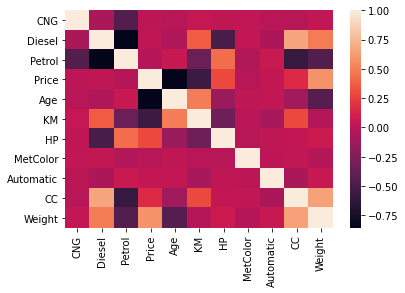

In [296]:
#it is not considerind Doors.....why??
sns.heatmap(corr)

In [303]:
#taking >0.5 correlation for further calculation as correlation is less in dataset for further calculation
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.5:
            if columns[j]:
                columns[j] = False

In [304]:
d=datasets.drop(['Doors'], axis=1)
selected_columns = d.columns[columns]
selected_columns.shape

(9,)

In [305]:
datasets = datasets[selected_columns]
print(datasets)

      CNG  Diesel  Petrol  Price  ...            KM     HP      MetColor  Automatic
0       0       1       0  13500  ...  46986.000000   90.0      1.000000          0
1       0       1       0  13750  ...  72937.000000   90.0      1.000000          0
2       0       1       0  13950  ...  41711.000000   90.0  68647.239972          0
3       0       1       0  14950  ...  48000.000000   90.0      0.000000          0
4       0       1       0  13750  ...  38500.000000   90.0      0.000000          0
...   ...     ...     ...    ...  ...           ...    ...           ...        ...
1431    0       0       1   7500  ...  20544.000000   86.0      1.000000          0
1432    0       0       1  10845  ...  68647.239972   86.0      0.000000          0
1433    0       0       1   8500  ...  17016.000000   86.0      0.000000          0
1434    0       0       1   7250  ...  68647.239972   86.0      1.000000          0
1435    0       0       1   6950  ...      1.000000  110.0      0.000000    